# Short training sequences
In this notebook I will try to text whether sequences trained for very short periods of work well in a couple of domains.

* Learning long list of sequences.
* Disambugation.

In [1]:
import pprint
import subprocess
import sys 
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

%matplotlib inline

np.set_printoptions(suppress=True, precision=2)

sns.set(font_scale=2.0)

#### Git machinery

In [2]:
run_old_version = False
if run_old_version:
    hash_when_file_was_written = '063dfb2c68ee9f1a3f22e951cfe291a03543e9bd'
    hash_at_the_moment = subprocess.check_output(["git", 'rev-parse', 'HEAD']).strip()
    print('Actual hash', hash_at_the_moment)
    
    print('Hash of the commit used to run the simulation', hash_when_file_was_written)
    subprocess.call(['git', 'checkout', hash_when_file_was_written])

#### Load libraries

In [3]:
from network import Protocol, BCPNNFast, NetworkManager
from plotting_functions import plot_winning_pattern
from analysis_functions import calculate_recall_success
from analysis_functions import calculate_timings

## Simple example

In [4]:
# Network parameters
minicolumns = 40
hypercolums = 4
number_of_patterns = 20
patterns_indexes = [i for i in range(number_of_patterns)]

# Training parameters
dt = 0.001
training_time = 0.020
inter_pulse_interval = 0.0
epochs = 3

# Build the network, manager and protocol
nn = BCPNNFast(hypercolumns=hypercolums, minicolumns=minicolumns)
manager = NetworkManager(nn, dt=dt, values_to_save=['o'])
simple_protocol = Protocol()
simple_protocol.simple_protocol(patterns_indexes=patterns_indexes, training_time=training_time, 
                                inter_sequence_interval=1.0, epochs=epochs)

In [5]:
# Train
manager.run_network_protocol(protocol=simple_protocol, verbose=False)

In [6]:
# Recall
T_recall = 5
T_cue = training_time
manager.run_network_recall(T_recall=T_recall, T_cue=0.020, I_cue=0)

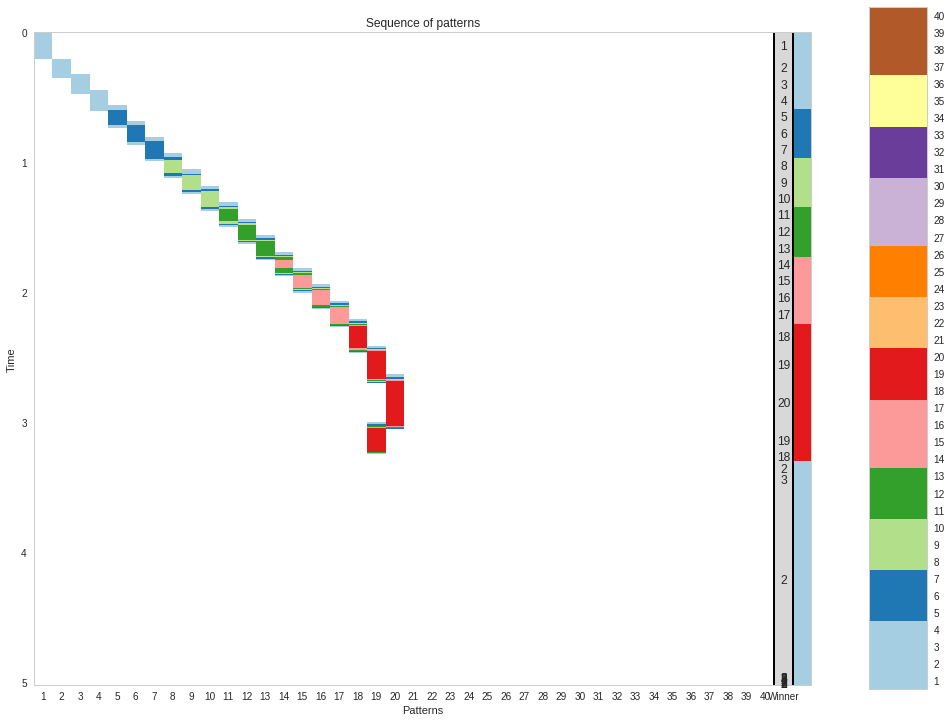

In [7]:
# Plot
plot_winning_pattern(manager);

In [8]:
timings = calculate_timings(manager=manager, remove=0.100)
timings = [timings[index] for index in patterns_indexes]

pattern_number = [time[0] for time in timings]
recall_times = [time[1] for time in timings]

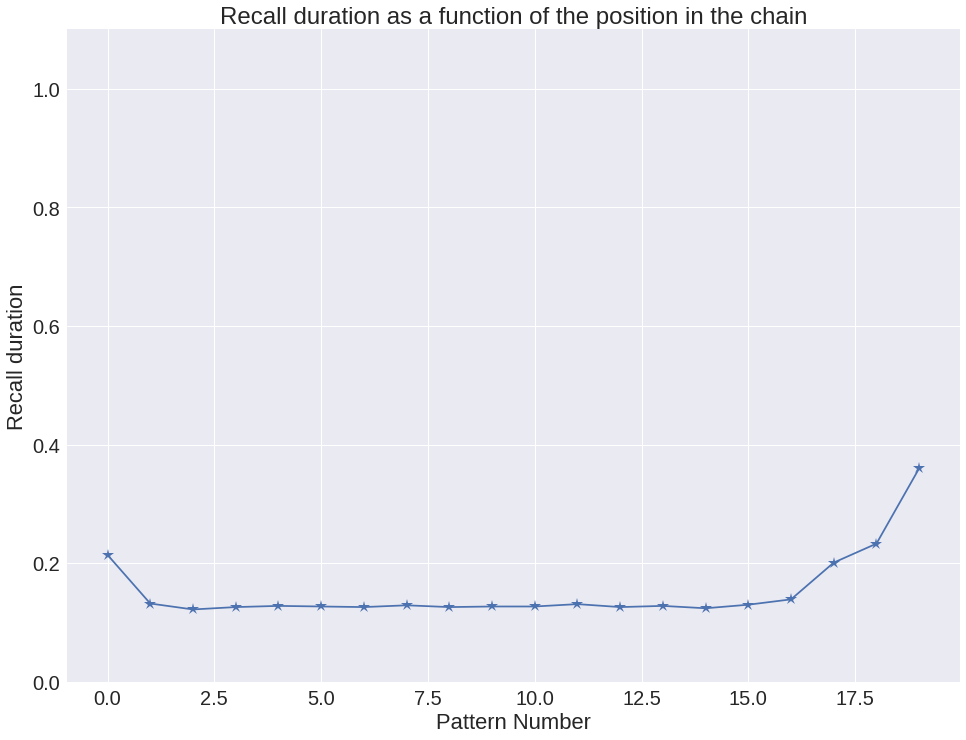

In [9]:
import seaborn as sns
sns.set(font_scale=2.0)

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(pattern_number, recall_times, '*-', markersize=12)

ax.set_title('Recall duration as a function of the position in the chain')
ax.set_xlabel('Pattern Number')
ax.set_ylabel('Recall duration')
ax.set_ylim([0, 1.1]);

# Long sequence probing at different points

In [10]:
# Network parameters
minicolumns = 80
hypercolums = 4
number_of_patterns = 60
patterns_indexes = [i for i in range(number_of_patterns)]

# Training parameters
dt = 0.001
training_time = 0.020
inter_pulse_interval = 0.0
epochs = 3

# Build the network, manager and protocol
nn = BCPNNFast(hypercolumns=hypercolums, minicolumns=minicolumns)
manager = NetworkManager(nn, dt=dt, values_to_save=['o'])
simple_protocol = Protocol()
simple_protocol.simple_protocol(patterns_indexes=patterns_indexes, training_time=training_time, 
                                inter_sequence_interval=1.0, epochs=epochs)

In [11]:
# Train
manager.run_network_protocol(protocol=simple_protocol, verbose=False)

In [12]:
# Recall
successes = []
T_cue = training_time
I_cue_range = np.arange(0, number_of_patterns - 1, 5)
for I_cue in I_cue_range:

    recall_patterns_indexes = [i for i in range(I_cue, number_of_patterns)]
    T_recall = len(recall_patterns_indexes) * 9 * training_time
    
    print(I_cue)
    print(T_recall)
   
    success = calculate_recall_success(manager, T_recall=T_recall, T_cue=0.100, I_cue=I_cue, n=10,
                                         patterns_indexes=recall_patterns_indexes)
    print(success)
    timings = calculate_timings(manager=manager, remove=0.010)
    pprint.pprint(timings)
    successes.append(success)


0
10.8
0.0
[(0, 0.28100000000000003, 0.0, 0.28000000000000003),
 (1, 0.128, 0.28000000000000003, 0.40700000000000003),
 (2, 0.127, 0.40700000000000003, 0.53300000000000003),
 (3, 0.124, 0.53300000000000003, 0.65600000000000003),
 (4, 0.126, 0.65600000000000003, 0.78100000000000003),
 (5, 0.124, 0.78100000000000003, 0.90400000000000003),
 (6, 0.128, 0.90400000000000003, 1.0309999999999999),
 (7, 0.125, 1.0309999999999999, 1.155),
 (8, 0.125, 1.155, 1.2790000000000001),
 (9, 0.126, 1.2790000000000001, 1.4040000000000001),
 (10, 0.126, 1.4040000000000001, 1.5290000000000001),
 (11, 0.128, 1.5290000000000001, 1.6560000000000001),
 (12, 0.125, 1.6560000000000001, 1.78),
 (13, 0.128, 1.78, 1.907),
 (14, 0.126, 1.907, 2.032),
 (15, 0.127, 2.032, 2.1579999999999999),
 (16, 0.125, 2.1579999999999999, 2.282),
 (17, 0.128, 2.282, 2.4090000000000003),
 (18, 0.125, 2.4090000000000003, 2.5329999999999999),
 (19, 0.127, 2.5329999999999999, 2.6590000000000003),
 (20, 0.125, 2.6590000000000003, 2.78299

In [13]:
recall_patterns_indexes

[55, 56, 57, 58, 59]

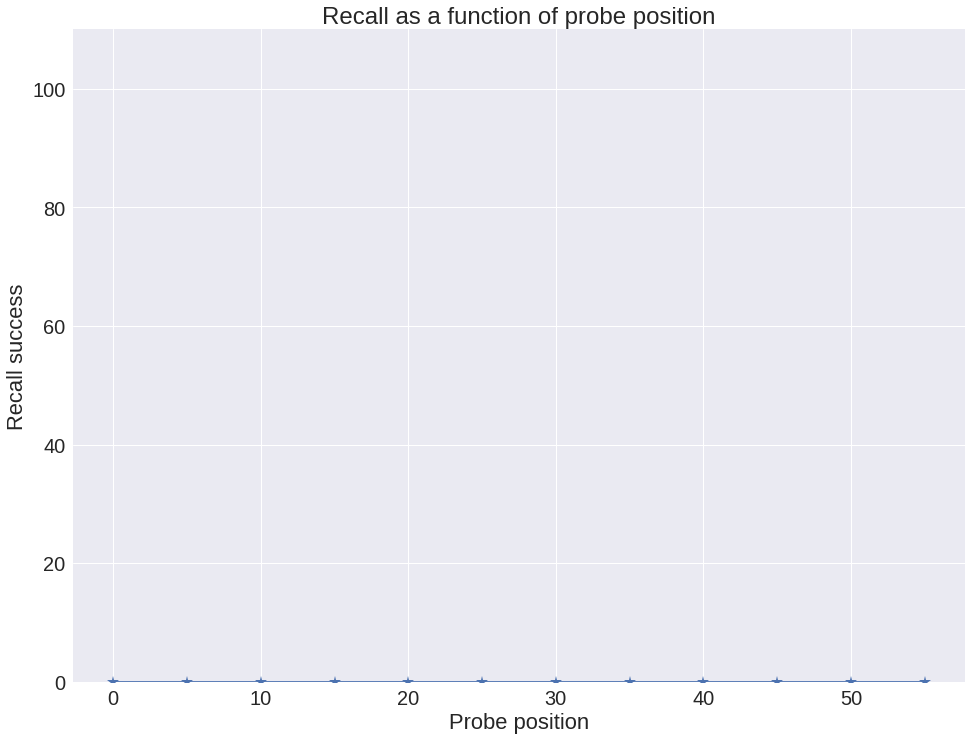

In [14]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(I_cue_range, successes, '*-', markersize=13)

ax.set_title('Recall as a function of probe position')
ax.set_xlabel('Probe position')
ax.set_ylabel('Recall success')
ax.set_ylim([0, 110]);

#### Git reload

In [15]:
if run_old_version:
    subprocess.call(['git', 'checkout', 'master'])